# Finding the ideal U.S. state for Data related I.T. positions.

The purpose of this notebook is to perform EDA on data derived from various online sources in order to determine 
the ideal U.S. state for an aspiring European citizen interested in entering the Data industry at a junior level.

The fist of the datasets that will be considered during the following analysis, contains valuable insights in terms of job listings in online job markets, such as Glassdoor (datamined during the summer of 2020).

The second dataset, is a collection of various indices (timeframe 2022) that will help in determing the overall cost of living per U.S. state.

Finally, a table containing the current (2022) effective tax rate on income per U.S. state is taken into account.

# Importing neccessary packages

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

Local data paths for each dataset file.

In [2]:
# Data paths
SALARY_DATA = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/DataScientist.csv"
COST_OF_LIVING = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/costofliving.csv"
TAXES = "/Users/synikola/Desktop/Github/EDAChallenge2022/DATA/TAXES.xlsx"

In [3]:
# Reading data into pandas dataframes
salary = pd.read_csv(SALARY_DATA)
cost = pd.read_csv(COST_OF_LIVING)
taxes = pd.read_excel(TAXES)

# Part A) Data cleaning

# A.1) Cleaning the salary related dataset

In [4]:
# View the table structure
salary.head(3)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True


In [5]:
salary.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [6]:
# View the data type of each column and make any changes for the following analysis
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

Columns relevant to the following analysis are: Job title, Salary Estimate, Location

In [7]:
# Keeping only relevant columns
salary = salary[["Job Title", "Salary Estimate", "Location"]]

In [8]:
# Finding per hour entries in salary estimates and turning their values into na
# (those entries will not be used for the following analysis)
salary.loc[salary["Salary Estimate"].str.contains("Per Hour"), "Salary Estimate"] = None

In [9]:
# Dropping na values in the dataset
salary.dropna(inplace = True)

In [10]:
# Checking the resulting dataframe
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3908
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3888 non-null   object
 1   Salary Estimate  3888 non-null   object
 2   Location         3888 non-null   object
dtypes: object(3)
memory usage: 121.5+ KB


Keeping only the starting salary from the salary estimate column.

In [11]:
# Using regex we replace the irrelevant characters from the string values in the "Salary Estimate" column.
salary["Minimum Salary"] =  salary['Salary Estimate'].replace('[Glassdoor est.K\)\(]', '' , regex = True)

In [12]:
# Keep only the minimum starting salary value in the range (minimum starting salary - maximum starting salary).
salary["Minimum Salary"] =  salary["Minimum Salary"].str.split('-').str[0]

In [13]:
# Remove the dollar sign.
salary["Minimum Salary"] = salary["Minimum Salary"].replace('\W', ' ', regex = True)

In [14]:
# Rename column to include the units of the salary
salary.rename(columns = {"Minimum Salary":"Minimum Salary (K $)"}, inplace = True)

In [15]:
# Change the values of the column into numerics
salary["Minimum Salary (K $)"] = pd.to_numeric(salary["Minimum Salary (K $)"])

We will filter our dataset for Job Titles that do not contain the word Data, assuming only those that do are
of interest for our analysis.

In [16]:
# Finding all none data related jobs (do not contain DATA in the job title) and assigning na values to them
salary.loc[~salary["Job Title"].str.contains(r"Data",regex = True), "Job Title"] = None

In [17]:
# Dropping the resulting na job titles
salary.dropna(inplace = True)

We will group into 3 categories Job Titles that fall into 3 generall categories in order to simplify our analysis.

In [18]:
# Finding all data scientists and assigning the title of Data Scientist to them.
salary.loc[salary["Job Title"].str.contains(r"(Data Scientist)|(Data Science)", regex = True), "Job Title"] = "Data Scientist"

In [19]:
# Finding all data analytics related jobs and assigning the title of Data Analyst to them.
salary.loc[salary["Job Title"].str.contains(r"(Data Analyst)|(Data Analytics)", regex = True), "Job Title"] = "Data Analyst"

In [20]:
# Finding all data engineering related jobs and assigning the title of Data Engineer to them.
salary.loc[salary["Job Title"].str.contains(r"(Data Engineer)|(Data Engineering)", regex = True), "Job Title"] = "Data Engineer"

In [21]:
# Adding a column with the state headline
salary["State Headline"] = salary["Location"].str.split(",").str[1]
# Remove white space
salary["State Headline"] = salary["State Headline"].str.strip()

In [22]:
# View cleaned dataframe
salary.head()

,Job Title,Salary Estimate,Location,Minimum Salary (K $),State Headline
0,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY
1,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY
2,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY
3,Data Analyst,$111K-$181K (Glassdoor est.),"Lyndhurst, NJ",111,NJ
4,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY


# A.2) Cleaning the cost of living dataset.

In [23]:
# Filtering the cost dataframe to contain only U.S. states locations.
cost = cost[cost["City"].str.contains("United States", regex= True)]

In [24]:
# View the resulting dataframe.
cost.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
10,NaN,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24
13,NaN,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00
18,NaN,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86
20,NaN,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78
21,NaN,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16


In [25]:
# Get info about the column types.
cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 10 to 314
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            0 non-null      float64
 1   City                            95 non-null     object 
 2   Cost of Living Index            95 non-null     float64
 3   Rent Index                      95 non-null     float64
 4   Cost of Living Plus Rent Index  95 non-null     float64
 5   Groceries Index                 95 non-null     float64
 6   Restaurant Price Index          95 non-null     float64
 7   Local Purchasing Power Index    95 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.7+ KB


In [26]:
# Remove irrelevant column.
cost = cost.drop('Rank', axis = 1)

In [27]:
# Reset the dataframe's index
cost.reset_index(inplace = True, drop = True)

In [28]:
# Create a new column out of the city column keeping only the CITY, STATE_ID information 
# similarly to the Location column of the salary dataframe 
cost["Location"] = cost["City"].replace(', United States', '', regex = True)

In [29]:
# View the resulting dataframe
cost.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location
0,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24,"Honolulu, HI"
1,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY"
2,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86,"Santa Barbara, CA"
3,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78,"Berkeley, CA"
4,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16,"San Francisco, CA"


In [30]:
# Merge the two dataframes (cost and salary on common values in the Location feature)
salary_cost = pd.merge(salary, cost, how = 'inner', on = "Location")

In [31]:
# View the merge of salary and cost dataframes
salary_cost.head()

,Job Title,Salary Estimate,Location,Minimum Salary (K $),State Headline,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0
1,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0
2,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0
3,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0
4,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0


# A.3) Cleaning the taxes dataframe.

In [32]:
# View the table
taxes.head()

,State,State HEADLINES,Effective Tax Rate
0,Alabama,AL,9.8
1,Alaska,AK,4.6
2,Arizona,AZ,9.5
3,Arkansas,AR,10.2
4,California,CA,13.5


In [33]:
# Check feature types
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               51 non-null     object 
 1   State HEADLINES     51 non-null     object 
 2   Effective Tax Rate  51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [34]:
# Renaming columns to follow the naming protocol of the previous dataframes
taxes.rename(columns = {"State HEADLINES":"State Headline"}, inplace = True)

In [35]:
# Merging all dataframes on location (left join because the taxes table date is on a state basis - not a city basis)
salary_cost_taxes = pd.merge(salary_cost, taxes, how = "left", on = "State Headline")

In [36]:
# Check result
salary_cost_taxes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Job Title                       2083 non-null   object 
 1   Salary Estimate                 2083 non-null   object 
 2   Location                        2083 non-null   object 
 3   Minimum Salary (K $)            2083 non-null   int64  
 4   State Headline                  2083 non-null   object 
 5   City                            2083 non-null   object 
 6   Cost of Living Index            2083 non-null   float64
 7   Rent Index                      2083 non-null   float64
 8   Cost of Living Plus Rent Index  2083 non-null   float64
 9   Groceries Index                 2083 non-null   float64
 10  Restaurant Price Index          2083 non-null   float64
 11  Local Purchasing Power Index    2083 non-null   float64
 12  State                           20

In [37]:
salary_cost_taxes.head(3)

,Job Title,Salary Estimate,Location,Minimum Salary (K $),State Headline,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,State,Effective Tax Rate
0,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0,New York,15.9
1,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0,New York,15.9
2,Data Scientist,$111K-$181K (Glassdoor est.),"New York, NY",111,NY,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0,New York,15.9


In [38]:
# Add the State Headline feature to the cost dataframe in order to merge it alone with the taxes dataframe
cost.head()
# Adding a column with the state headline
cost["State Headline"] = cost["Location"].str.split(",").str[1]
# Remove white space
cost["State Headline"] = cost["State Headline"].str.strip()

In [39]:
# Merge cost and taxes dataframe
cost_taxes = pd.merge(cost, taxes, how = "left", on = "State Headline")

In [40]:
# View resulting dataframe
cost_taxes.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Location,State Headline,State,Effective Tax Rate
0,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24,"Honolulu, HI",HI,Hawaii,14.1
1,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY",NY,New York,15.9
2,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86,"Santa Barbara, CA",CA,California,13.5
3,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78,"Berkeley, CA",CA,California,13.5
4,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16,"San Francisco, CA",CA,California,13.5


#  Part B) Analysis

Create a query of Job Titles of interest

In [41]:
# List of Job titles of interest
query = ["Data Scientist", 
         "Data Analyst",
         "Data Specialist", 
         "Data science researcher",
         "Data Engineer",
         "Technical Data Consultant",
         "Machine Learning Engineer"]

First we will find the average minimum starting salary per job title of the query in the US.

In [42]:
# Group by Job Title , calculate average salary, sort desc
av_sal = salary_cost_taxes.groupby("Job Title").agg({
    "Minimum Salary (K $)":"mean"}).sort_values("Minimum Salary (K $)", ascending = False).reset_index()

In [43]:
# Keep only the job titles contained in the initial query
av_sal = av_sal[av_sal["Job Title"].isin(query)]

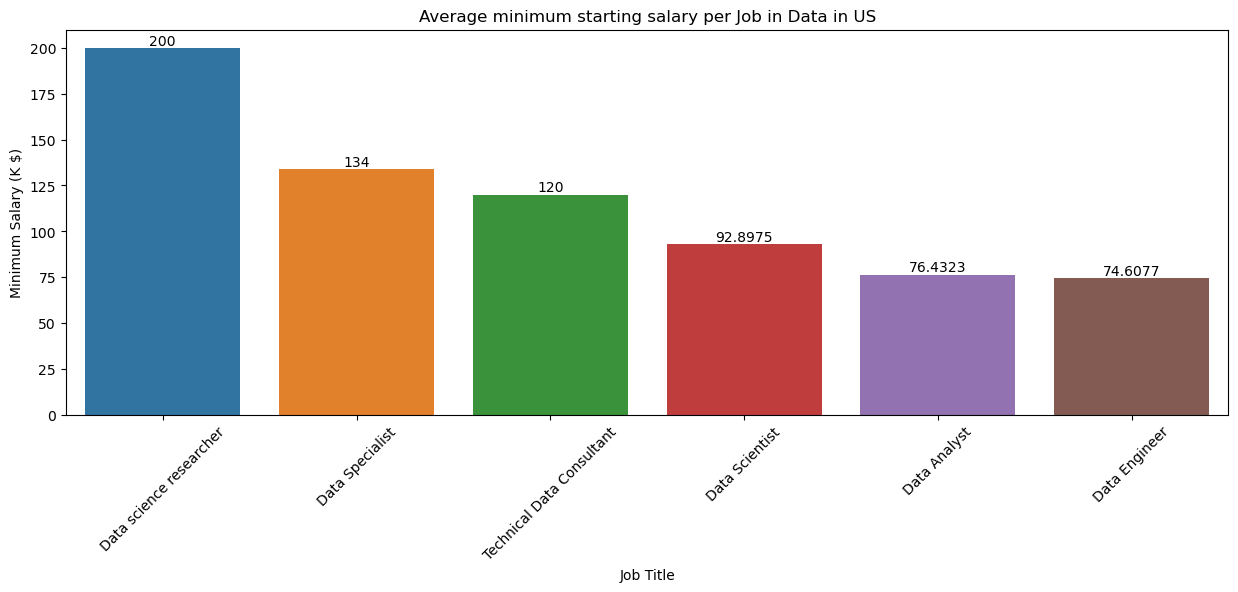

In [44]:
# Plot the av_sal
plt.figure(figsize = [15,5])
ax = sns.barplot(data = av_sal , x = av_sal["Job Title"], y = av_sal["Minimum Salary (K $)"])
ax.set(title = "Average minimum starting salary per Job in Data in US")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

Average minimum starting salary for each location. Which are the top 10 locations with the highest values,
which are the bottom 10?

In [45]:
av_loc = salary_cost_taxes.groupby("Location").agg({
    "Minimum Salary (K $)":"mean"}).sort_values("Minimum Salary (K $)", ascending = False).reset_index()

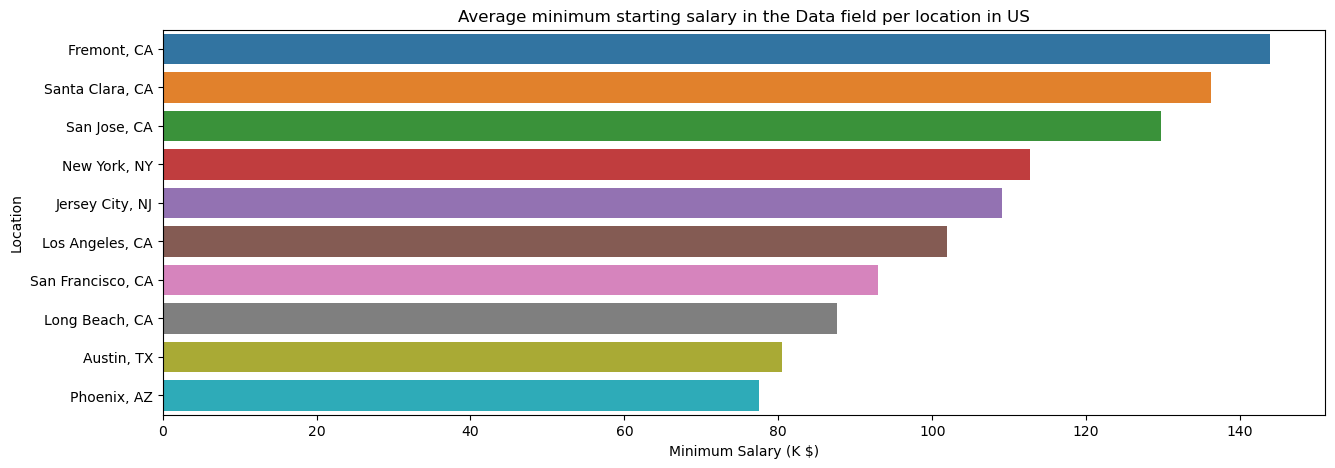

In [46]:
loc_top = av_loc.head(10)
# Plot the top 10 highest salary locations
plt.figure(figsize = [15,5])
ax = sns.barplot(data = loc_top , y = loc_top["Location"], x = loc_top["Minimum Salary (K $)"])
ax.set(title = "Average minimum starting salary in the Data field per location in US")
#ax.bar_label(ax.containers[0])
plt.show()

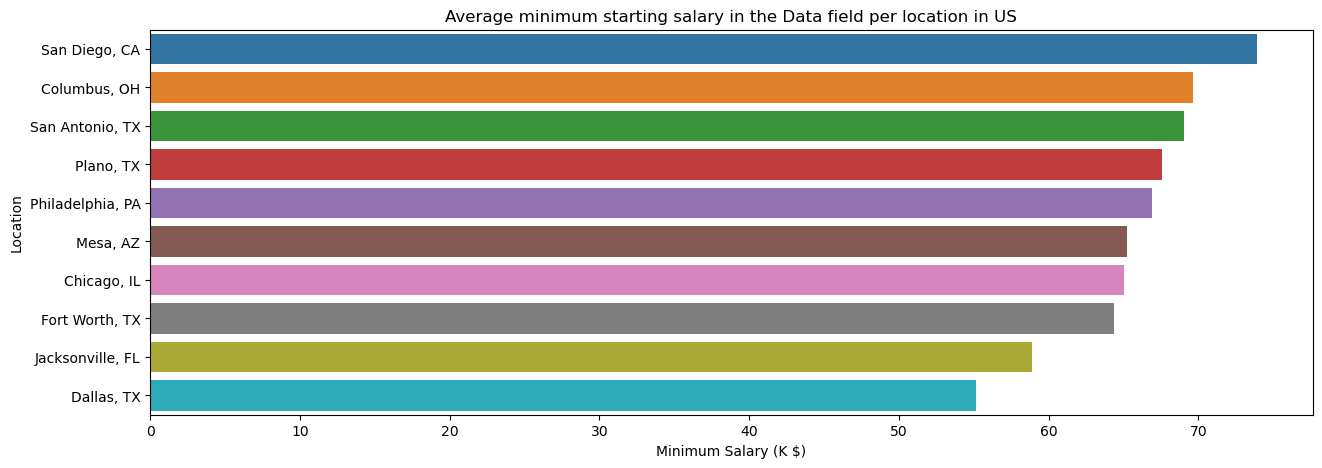

In [47]:
loc_bot = av_loc.tail(10)
# Plot the bottom 10 lowest salary locations
plt.figure(figsize = [15,5])
ax = sns.barplot(data = loc_bot , y = loc_bot["Location"], x = loc_bot["Minimum Salary (K $)"])
ax.set(title = "Average minimum starting salary in the Data field per location in US")
#ax.bar_label(ax.containers[0])
plt.show()

Cost of living around U.S.

In [56]:
# Using the cost_taxes merge we plot the Cost of Living Plus Rent Index for each state available in the dataframe
fig = px.choropleth(cost_taxes,
                    locations = "State Headline", 
                    locationmode = "USA-states", 
                    scope = "usa",
                    color = "Cost of Living Plus Rent Index",
                    color_continuous_scale = "Viridis_r"
                    )
fig.show()

In [57]:
# Plotting the effective tax rate around US using the taxes dataframe
fig = px.choropleth(taxes,
                    locations = "State Headline", 
                    locationmode = "USA-states", 
                    scope = "usa",
                    color = "Effective Tax Rate",
                    color_continuous_scale = "Viridis_r"
                    )
fig.show()